In [1]:
from stock.tw_stock import tw_stock
from stock.strategy import 雙重金死叉策略
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 初始化
tw = tw_stock()
start = datetime.datetime(2018, 12, 1)
end = datetime.datetime(2022, 3, 1)

# 資料擷取
close = tw.get("close", start, end)
open_ = tw.get("open", start, end)
high = tw.get("high", start, end)
low = tw.get("low", start, end)
volume = tw.get("volume", start, end)

# 技術指標
K, D = tw.get_technical_index("KD", close, open_, high, low, volume)
macd, macdsignal, _ = tw.get_technical_index("MACD", close, open_, high, low, volume)

# 回測參數
觀察天數 = 5
停利 = 0.10
停損 = -0.05
result = []

# 回測主流程
for i in range(35, len(close) - 觀察天數):  # 留一點 buffer 避免前期 NaN
    try:
        res = 雙重金死叉策略(close, K, D, macd, macdsignal, x=i)
        buy_date = res["date"]
        for stock in res["stocks"]:
            buy_price = close.iloc[i][stock]
            future_prices = close.iloc[i+1:i+1+觀察天數][stock].values
            if pd.isna(buy_price) or np.isnan(future_prices).any():
                continue
            for j, price in enumerate(future_prices):
                pct = (price - buy_price) / buy_price
                if pct >= 停利:
                    result.append({
                        "股票": stock,
                        "進場日": buy_date,
                        "出場日": close.index[i+1+j],
                        "進場價": buy_price,
                        "出場價": price,
                        "報酬率": round(pct * 100, 2),
                        "持有天數": j+1,
                        "結果": "勝利"
                    })
                    break
                elif pct <= 停損:
                    result.append({
                        "股票": stock,
                        "進場日": buy_date,
                        "出場日": close.index[i+1+j],
                        "進場價": buy_price,
                        "出場價": price,
                        "報酬率": round(pct * 100, 2),
                        "持有天數": j+1,
                        "結果": "失敗"
                    })
                    break
            else:
                pct = (future_prices[-1] - buy_price) / buy_price
                result.append({
                    "股票": stock,
                    "進場日": buy_date,
                    "出場日": close.index[i+觀察天數],
                    "進場價": buy_price,
                    "出場價": future_prices[-1],
                    "報酬率": round(pct * 100, 2),
                    "持有天數": 觀察天數,
                    "結果": "未達標"
                })
    except Exception as e:
        print(f"錯誤於第 {i} 天: {e}")
        continue

# 整理結果
df_result = pd.DataFrame(result)
df_result.to_csv("macd_kd_cross_backtest.csv", index=False)
print(f"完成！共有 {len(df_result)} 筆回測紀錄")

# 顯示前幾筆
print(df_result.head())


2019-01-22 00:00:00符合雙重金死叉策略的股票有4檔股票,包括:['2939' '6289' '6579' '8039']
2019-01-23 00:00:00符合雙重金死叉策略的股票有1檔股票,包括:['4566']
2019-01-24 00:00:00符合雙重金死叉策略的股票有3檔股票,包括:['1449' '2007' '6271']
2019-01-25 00:00:00符合雙重金死叉策略的股票有6檔股票,包括:['2008' '2015' '2328' '2329' '4930' '6405']
2019-01-28 00:00:00符合雙重金死叉策略的股票有6檔股票,包括:['1442' '2617' '2881' '4306' '5243' '6416']
2019-01-29 00:00:00符合雙重金死叉策略的股票有3檔股票,包括:['2008' '2495' '2739']
2019-01-30 00:00:00符合雙重金死叉策略的股票有4檔股票,包括:['1506' '2024' '2397' '2882A']
2019-02-11 00:00:00符合雙重金死叉策略的股票有1檔股票,包括:['2415']
2019-02-12 00:00:00符合雙重金死叉策略的股票有10檔股票,包括:['1459' '2206' '2349' '2373' '2399' '2506' '3164' '3535' '6505' '910482']
2019-02-13 00:00:00符合雙重金死叉策略的股票有1檔股票,包括:['6226']
2019-02-14 00:00:00符合雙重金死叉策略的股票有3檔股票,包括:['1718' '2204' '2243']
2019-02-15 00:00:00符合雙重金死叉策略的股票有1檔股票,包括:['00654R']
2019-02-18 00:00:00符合雙重金死叉策略的股票有2檔股票,包括:['2609' '8072']
2019-02-19 00:00:00符合雙重金死叉策略的股票有3檔股票,包括:['2008' '2206' '6285']
2019-02-20 00:00:00符合雙重金死叉策略的股票有1檔股票,包括:['1436']
2019-02-21 00:00:00符合

In [7]:
df_result.to_csv('MACD_KD_Strategy_result.csv',index=False)


c:\Users\tsai\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\tsai\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 36948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\tsai\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\tsai\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\tsai\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\tsai\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21213 missing from current

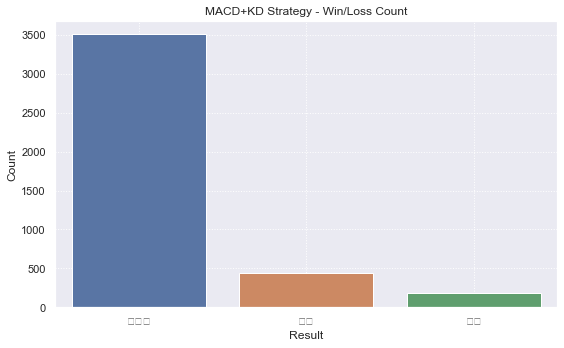

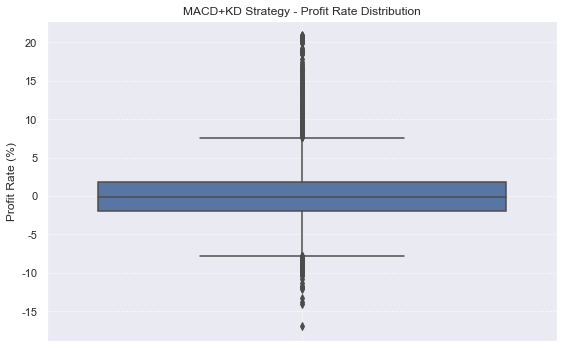

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 若還沒分類「結果」欄，這裡自動加上
if "結果" not in df_result.columns:
    df_result["結果"] = df_result["報酬率"].apply(lambda x: "Win" if x > 0 else "Loss")

# 設定 matplotlib 樣式
plt.rcParams['axes.unicode_minus'] = False
sns.set_theme()

# 1️⃣ Win/Loss Count Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df_result, x='結果')
plt.title("MACD+KD Strategy - Win/Loss Count")
plt.ylabel("Count")
plt.xlabel("Result")
plt.grid(True, linestyle='dotted')
plt.tight_layout()
plt.show()

# 2️⃣ Profit Rate Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_result, y='報酬率')
plt.title("MACD+KD Strategy - Profit Rate Distribution")
plt.ylabel("Profit Rate (%)")
plt.grid(True, linestyle='dotted')
plt.tight_layout()
plt.show()
